# Enter Student Name & ID

In [81]:
student_id =   "400101934"
student_name = "Nikoo Moradi"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101934
your name: Nikoo Moradi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [82]:
import numpy as np

In [83]:
def myPCA(X, num_components):
    #
    # Complete
    #
    N = X.shape[0] - 1 # number of samples
    X_centered = X - np.mean(X, axis=0)

    covariance_matrix = (np.dot(X_centered.T , X_centered)) / N
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, :num_components]
    X_pca = np.dot(X_centered,eigenvector_subset)

    return X_pca


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [84]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [85]:
iris = load_iris()
X = iris.data
y = iris.target
unique_elements = np.unique(y)


In [86]:
num_components = 2
X_transformed = myPCA(X, num_components)

print(X_transformed.shape)

(150, 2)


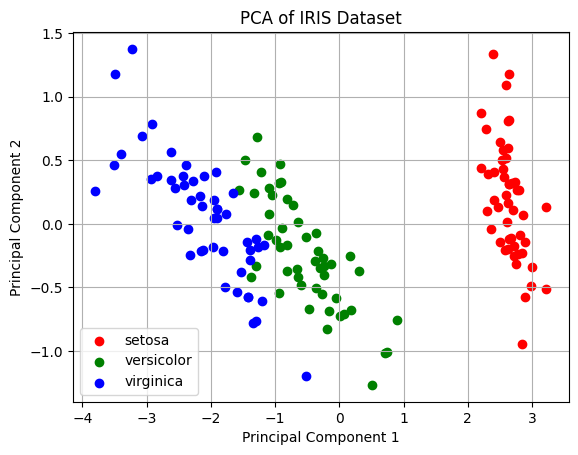

In [97]:
# myPCA on IRIS
plt.figure()

for target, color in zip(unique_elements, ['r', 'g', 'b']):
    subset = X_transformed[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[target], c=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.grid(True)
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. These eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of possible faces.

**Relation to PCA**:

1. **Dimensionality Reduction**:
Eigenfaces are computed by applying PCA to a large set of face images. PCA helps reduce the dimensionality of the data while preserving the most significant features, which are the principal components.

2. **Principal Components**: In the context of face recognition, the principal components (eigenfaces) represent the directions in which the face images vary the most.

3. **Face Representation**: Each face image can be approximated by a linear combination of the top eigenfaces. This compact representation captures the essential features needed for face recognition.




### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [88]:
!pip install opencv-python


In [89]:
import zipfile
import os

# Assuming the zip file is uploaded to the root directory
zip_path = '/content/FacesDataset1.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [90]:
import cv2
import numpy as np
import os
from PIL import Image
from sklearn.decomposition import PCA


dataset_path = "/content/dataset/ORL"

X_train, X_test = [], []
y_train, y_test = [], []
data = []
labels=[]

for person_id in range(1, 41):
    person_path = os.path.join(dataset_path, f's{person_id}')

    for image_id in range(1, 11):
        image_path = os.path.join(person_path, f'{image_id}.bmp')
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        data.append(image)
        labels.append(person_id)

        if image_id <= 5:
            X_train.append(image)
            y_train.append(person_id)
        else:
            X_test.append(image)
            y_test.append(person_id)



X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
data = np.stack(data)
labels=np.array(labels)

# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
X_flattened = data.reshape(data.shape[0], -1)

print(f'data shape: {data.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train_flattened shape: {X_train_flattened.shape}')
print(f'X_test_flattened shape: {X_test_flattened.shape}')
print(f'X_flattened shape: {X_flattened.shape}')


data shape: (400, 48, 48)
X_train shape: (200, 48, 48)
X_test shape: (200, 48, 48)
y_train shape: (200,)
y_test shape: (200,)
X_train_flattened shape: (200, 2304)
X_test_flattened shape: (200, 2304)
X_flattened shape: (400, 2304)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [91]:
num_components = 45

pca = PCA(n_components=num_components)
pca.fit(X_flattened)
transformed_train = pca.transform(X_train_flattened)
transformed_test = pca.transform(X_test_flattened)

print(transformed_test.shape)

(200, 45)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [93]:
# train
lda = LDA()
lda.fit_transform(transformed_train, y_train)

#predict
y_pred = lda.predict(transformed_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.50%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [94]:
import torch
accuracies = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for num_components in range(100, 41, -1):

    pca = PCA(n_components=num_components)
    pca.fit(X_flattened)
    transformed_train = pca.transform(X_train_flattened)
    transformed_test = pca.transform(X_test_flattened)

    print(f'X_train_pca shape: {transformed_train.shape}')
    print(f'X_test_pca shape: {transformed_test.shape}')

    # train
    lda = LDA()
    lda.fit(transformed_train, y_train)

    #predict
    y_pred = lda.predict(transformed_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%\n')
    accuracies.append(accuracy)

X_train_pca shape: (200, 100)
X_test_pca shape: (200, 100)
Accuracy: 91.00%

X_train_pca shape: (200, 99)
X_test_pca shape: (200, 99)
Accuracy: 92.50%

X_train_pca shape: (200, 98)
X_test_pca shape: (200, 98)
Accuracy: 91.50%

X_train_pca shape: (200, 97)
X_test_pca shape: (200, 97)
Accuracy: 91.50%

X_train_pca shape: (200, 96)
X_test_pca shape: (200, 96)
Accuracy: 91.00%

X_train_pca shape: (200, 95)
X_test_pca shape: (200, 95)
Accuracy: 91.50%

X_train_pca shape: (200, 94)
X_test_pca shape: (200, 94)
Accuracy: 91.50%

X_train_pca shape: (200, 93)
X_test_pca shape: (200, 93)
Accuracy: 91.50%

X_train_pca shape: (200, 92)
X_test_pca shape: (200, 92)
Accuracy: 91.00%

X_train_pca shape: (200, 91)
X_test_pca shape: (200, 91)
Accuracy: 91.50%

X_train_pca shape: (200, 90)
X_test_pca shape: (200, 90)
Accuracy: 92.00%

X_train_pca shape: (200, 89)
X_test_pca shape: (200, 89)
Accuracy: 92.50%

X_train_pca shape: (200, 88)
X_test_pca shape: (200, 88)
Accuracy: 92.50%

X_train_pca shape: (200

Text(0, 0.5, 'Accuracy')

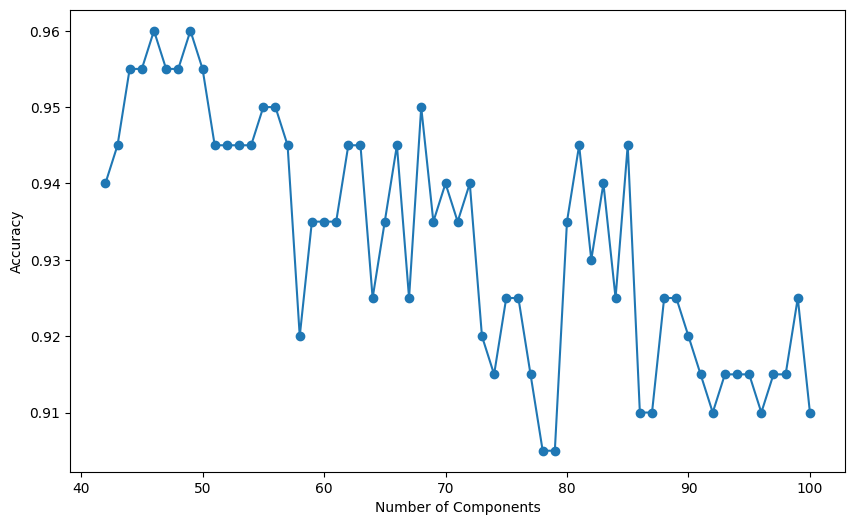

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(range(100, 41, -1), accuracies, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')